# Simple Linear Regression in Python

## Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset from local repository
df = pd.read_csv('health_data.csv') # Synthetic data
df.head()

,calorie_intake,body_weight
0,2099.342831,152.136400
1,1972.347140,147.776066
2,2129.537708,155.791456
3,2304.605971,163.625744
4,1953.169325,147.335895


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   calorie_intake  100 non-null    float64
 1   body_weight     100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Independent variable (X) is calorie intake and dependent variable (y) is body weight. The data is already in a clean state so there is no need for data cleansing.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calorie_intake,100.0,1979.230697,181.633686,1476.050979,1879.818866,1974.608742,2081.190410,2370.455637
body_weight,100.0,149.006144,9.021572,124.355931,143.245522,149.271076,154.365993,169.564500


##  Assumptions of Simple Linear Regression

### Normality Test Using Distribution Plot

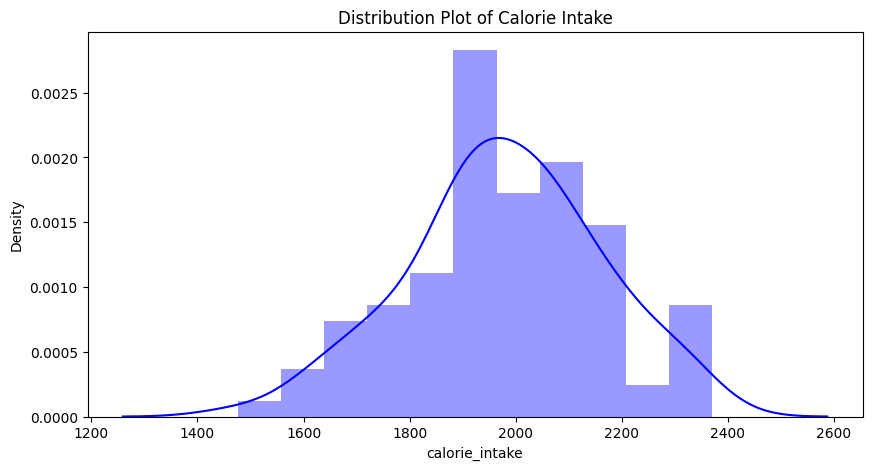

In [9]:
plt.figure(figsize=(10,5))
plt.title('Distribution Plot of Calorie Intake')
sns.distplot(df['calorie_intake'], color='blue')
plt.show()

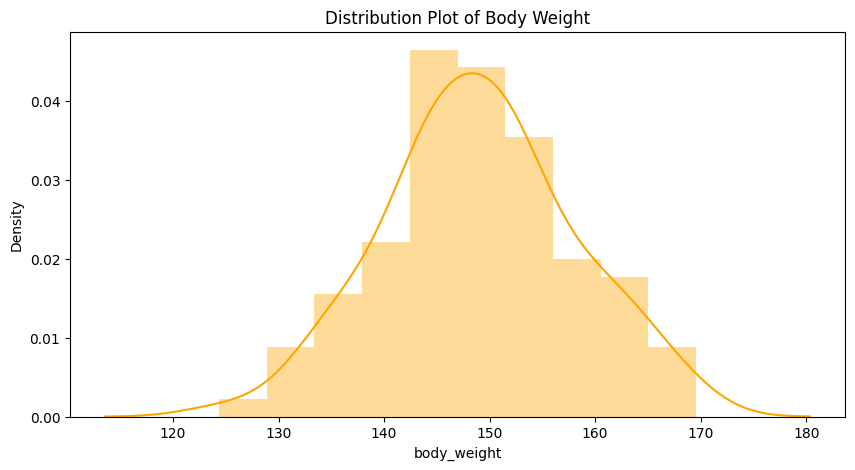

In [11]:
plt.figure(figsize=(10,5))
plt.title('Distribution Plot of Body Weight')
sns.distplot(df['body_weight'], color='orange')
plt.show()

### Linearity Test Using Scatter Plot

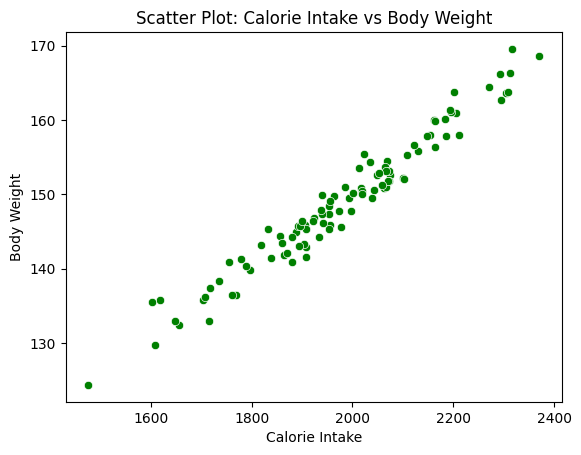

In [13]:
sns.scatterplot(x=df['calorie_intake'], y=df['body_weight'], color='green')
plt.title('Scatter Plot: Calorie Intake vs Body Weight')
plt.xlabel('Calorie Intake')
plt.ylabel('Body Weight')
plt.show()

## Fit Model

### Define X and y

In [15]:
X = df.drop(['calorie_intake'],axis=1) # independent variable
y = df['body_weight'] # dependent variable

In [17]:
X.head()

,body_weight
0,152.136400
1,147.776066
2,155.791456
3,163.625744
4,147.335895


In [19]:
y.head()

0    152.136400
1    147.776066
2    155.791456
3    163.625744
4    147.335895
Name: body_weight, dtype: float64

### Split data into Training data and Testing Data

In [21]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Train Simple Linear Regression Model

In [23]:
simple_regressor = LinearRegression()
simple_regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
# Coefficient Output
print(f"Intercept: {simple_regressor.intercept_}")
print(f"Coefficient: {simple_regressor.coef_[0]}")

Intercept: -2.842170943040401e-14
Coefficient: 1.0000000000000002


### Model Evaluation

In [27]:
# Predicit on testing and training data
y_pred_test = simple_regressor.predict(X_test)
y_pred_train = simple_regressor.predict(X_train)

# Model Evaluation on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Model Evaluation on Testing Data:')
print(f"Mean Squared Error: {mse_test}")
print(f"Root Mean Squared Error: {rmse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"Mean Absolute Percentage Error {mape_test}")
print(f"R-squared: {r2_test}")

# Model evaluation on training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = sqrt(mse_train)
mae_train  = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print('-------')
print('Model Evaluation on Training Data')
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"Mean Absolute Percentage Error {mape_train}")
print(f"R-squared: {r2_train}")

Model Evaluation on Testing Data:
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Absolute Percentage Error 0.0
R-squared: 1.0
-------
Model Evaluation on Training Data
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Absolute Percentage Error 0.0
R-squared: 1.0


### Visualization

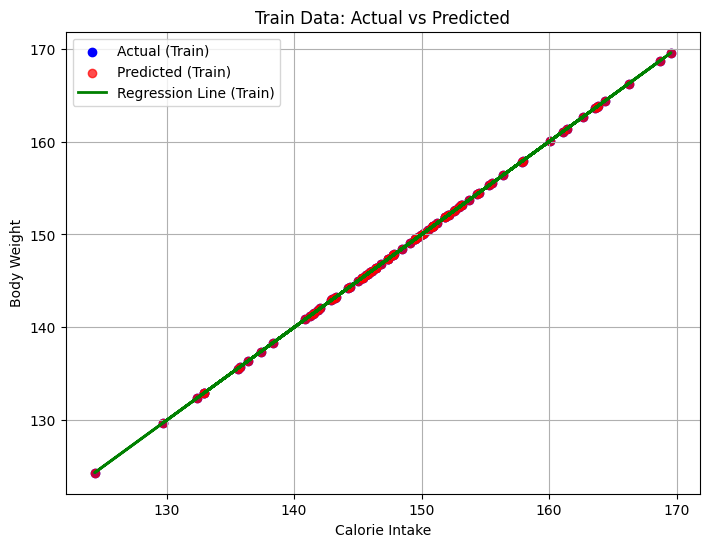

In [29]:
# Visualisize comparison on training data
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual (Train)')
plt.scatter(X_train, y_pred_train, color='red', label='Predicted (Train)', alpha=0.7)
plt.plot(X_train, y_pred_train, color='green', label='Regression Line (Train)', linewidth=2)
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Calorie Intake')
plt.ylabel('Body Weight')
plt.legend()
plt.grid()

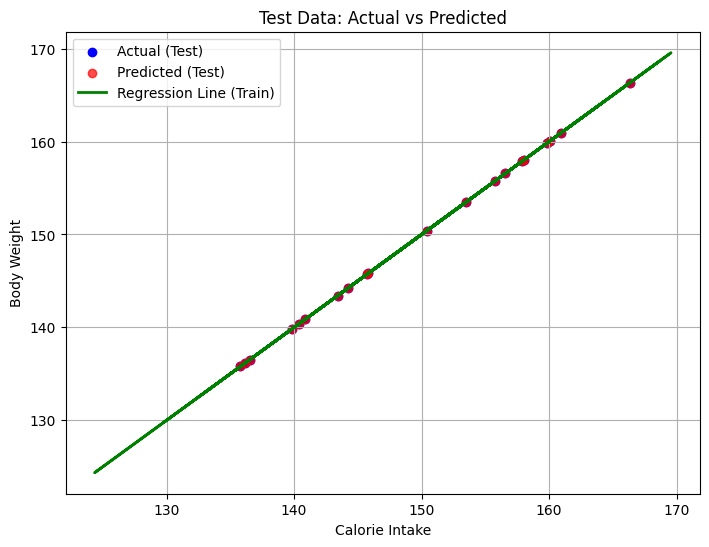

In [33]:
# Visualize comparison testing data
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2) 
plt.scatter(X_test, y_test, color='blue', label='Actual (Test)')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted (Test)', alpha=0.7)
plt.plot(X_train, y_pred_train, color='green', label='Regression Line (Train)', linewidth=2)  # Gunakan regresi dari train
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Calorie Intake')
plt.ylabel('Body Weight')
plt.legend()
plt.grid()

## Conclusion

1. A simple linear regression model was obtained with the following coefficients:  
- **Intercept**: `-2.842170943040401e-14`  
- **Slope**: `1.0000000000000002`  

The regression equation is:  
**`body weight = -2.842170943040401e-14 + 1.0000000000000002 (calorie intake)`**  

Interpretation:  
- If the **calorie intake** is 0, the predicted **body weight** is approximately `-2.842170943040401e-14`.  
- The slope `1.0000000000000002` indicates that for every unit increase in calorie intake, body weight is expected to increase by approximately 1 unit.

2. Model Evaluation
- The model evaluation on both the training and test data showed **excellent results**:  
  - **R²** (Coefficient of Determination): `1`  
  - **MSE** (Mean Squared Error): `0`

3. Data Distribution
- Based on the histogram with a distribution plot, The data is **normally distributed**, meaning most of the data points are clustered around the mean.

4. Scatter Plot Analysis
- The scatter plot indicates a **linear relationship** between **body weight** and **calorie intake** which means Higher calorie intake is associated with higher body weight.
